In [1]:
import numpy as np
import pandas as pd ##dataframe _like stl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno ##for graph
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
##see through notebook, not new window

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
for col in df_train.columns:
    msg = 'column: {:>10}\t percent of NaN value {:.2f}%'.\
    format(col, 100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value 0.00%
column:   Survived	 percent of NaN value 0.00%
column:     Pclass	 percent of NaN value 0.00%
column:       Name	 percent of NaN value 0.00%
column:        Sex	 percent of NaN value 0.00%
column:        Age	 percent of NaN value 19.87%
column:      SibSp	 percent of NaN value 0.00%
column:      Parch	 percent of NaN value 0.00%
column:     Ticket	 percent of NaN value 0.00%
column:       Fare	 percent of NaN value 0.00%
column:      Cabin	 percent of NaN value 77.10%
column:   Embarked	 percent of NaN value 0.22%


In [5]:
for col in df_test.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'\
    .format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 20.57%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 0.00%
column:       Fare	 percent of NaN value: 0.24%
column:      Cabin	 percent of NaN value: 78.23%
column:   Embarked	 percent of NaN value: 0.00%


<AxesSubplot:>

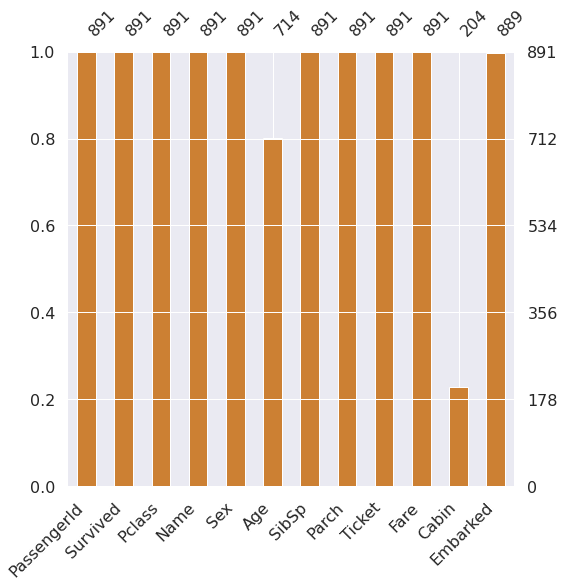

In [6]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<function matplotlib.pyplot.show(close=None, block=None)>

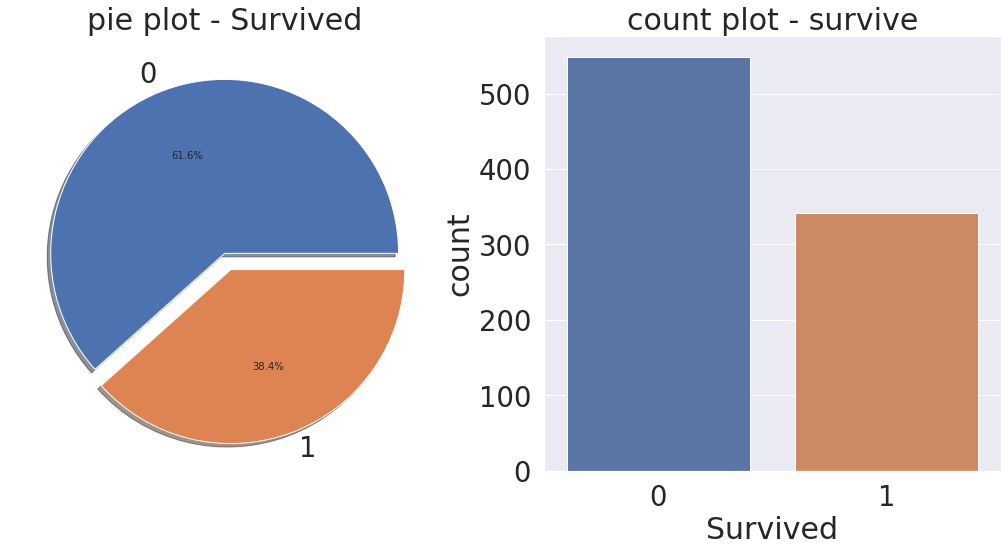

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts()\
.plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0],\
         shadow=True)
ax[0].set_title('pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('count plot - survive')

plt.show

<AxesSubplot:xlabel='Pclass'>

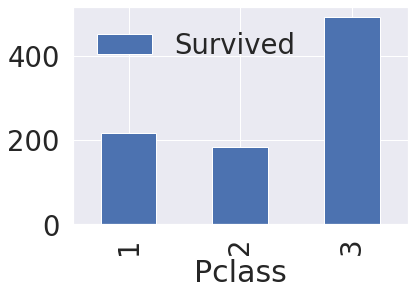

In [8]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count().plot.bar()

<AxesSubplot:xlabel='Pclass'>

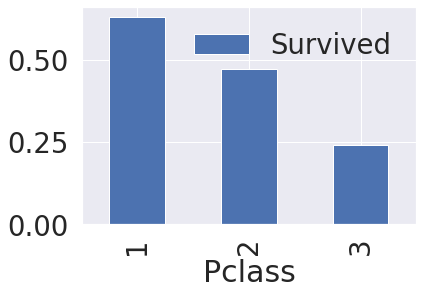

In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

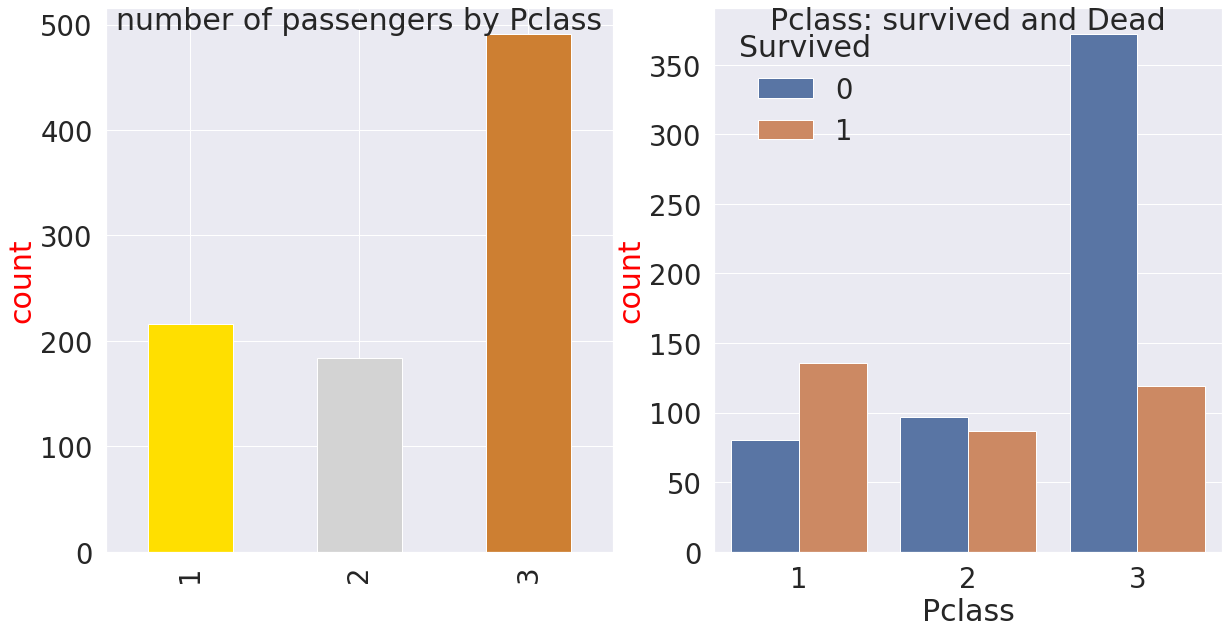

In [10]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
y_position=0.95
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('number of passengers by Pclass', y=y_position)
ax[0].set_ylabel('count', color = 'Red')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: survived and Dead', y=y_position)
ax[1].set_ylabel('count', color = 'Red')
plt.show()

Text(0.5, 1.0, 'Sex : survived vs dead')

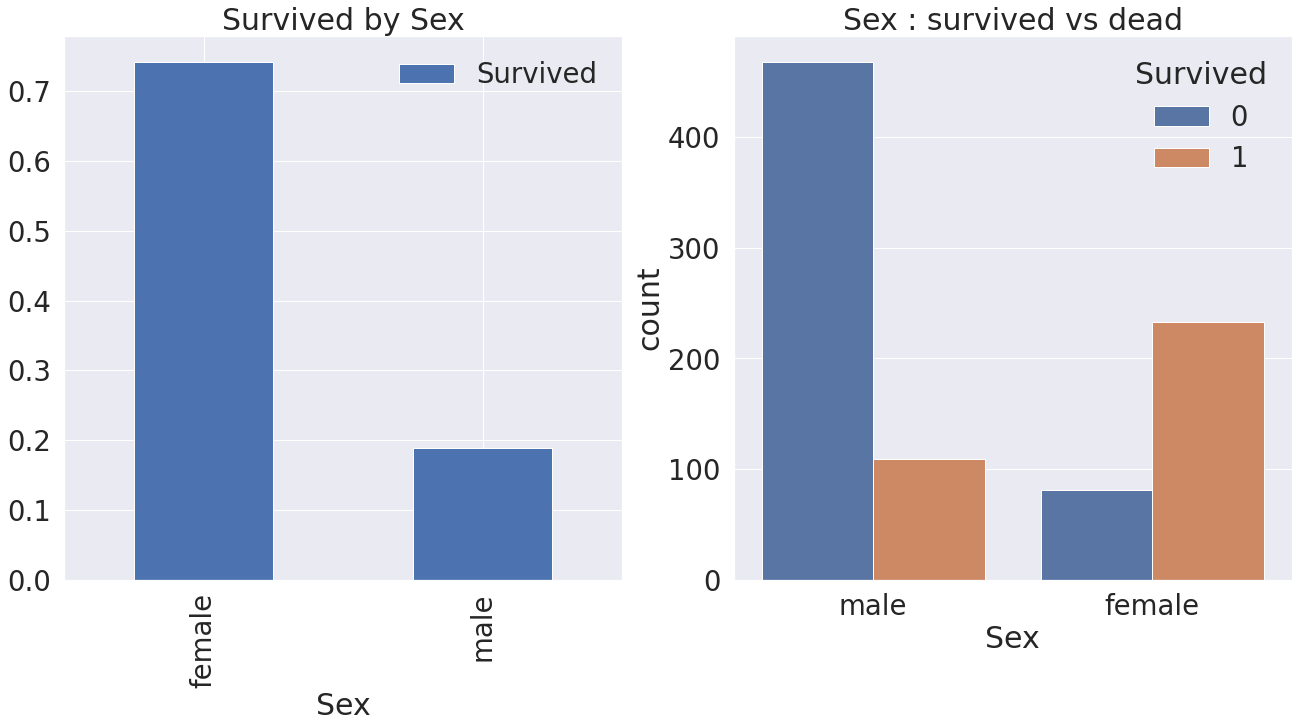

In [11]:
f, ax = plt.subplots(1, 2, figsize=(22,10))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : survived vs dead')

In [12]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


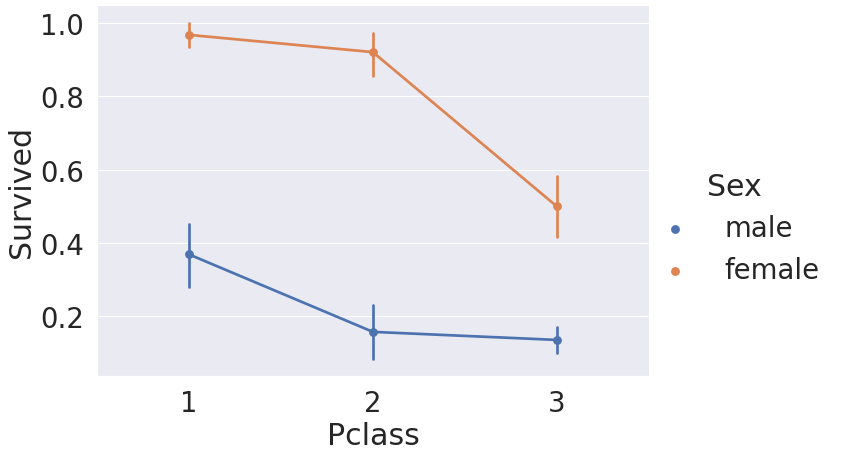

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex', data=df_train, size=6, aspect=1.5)

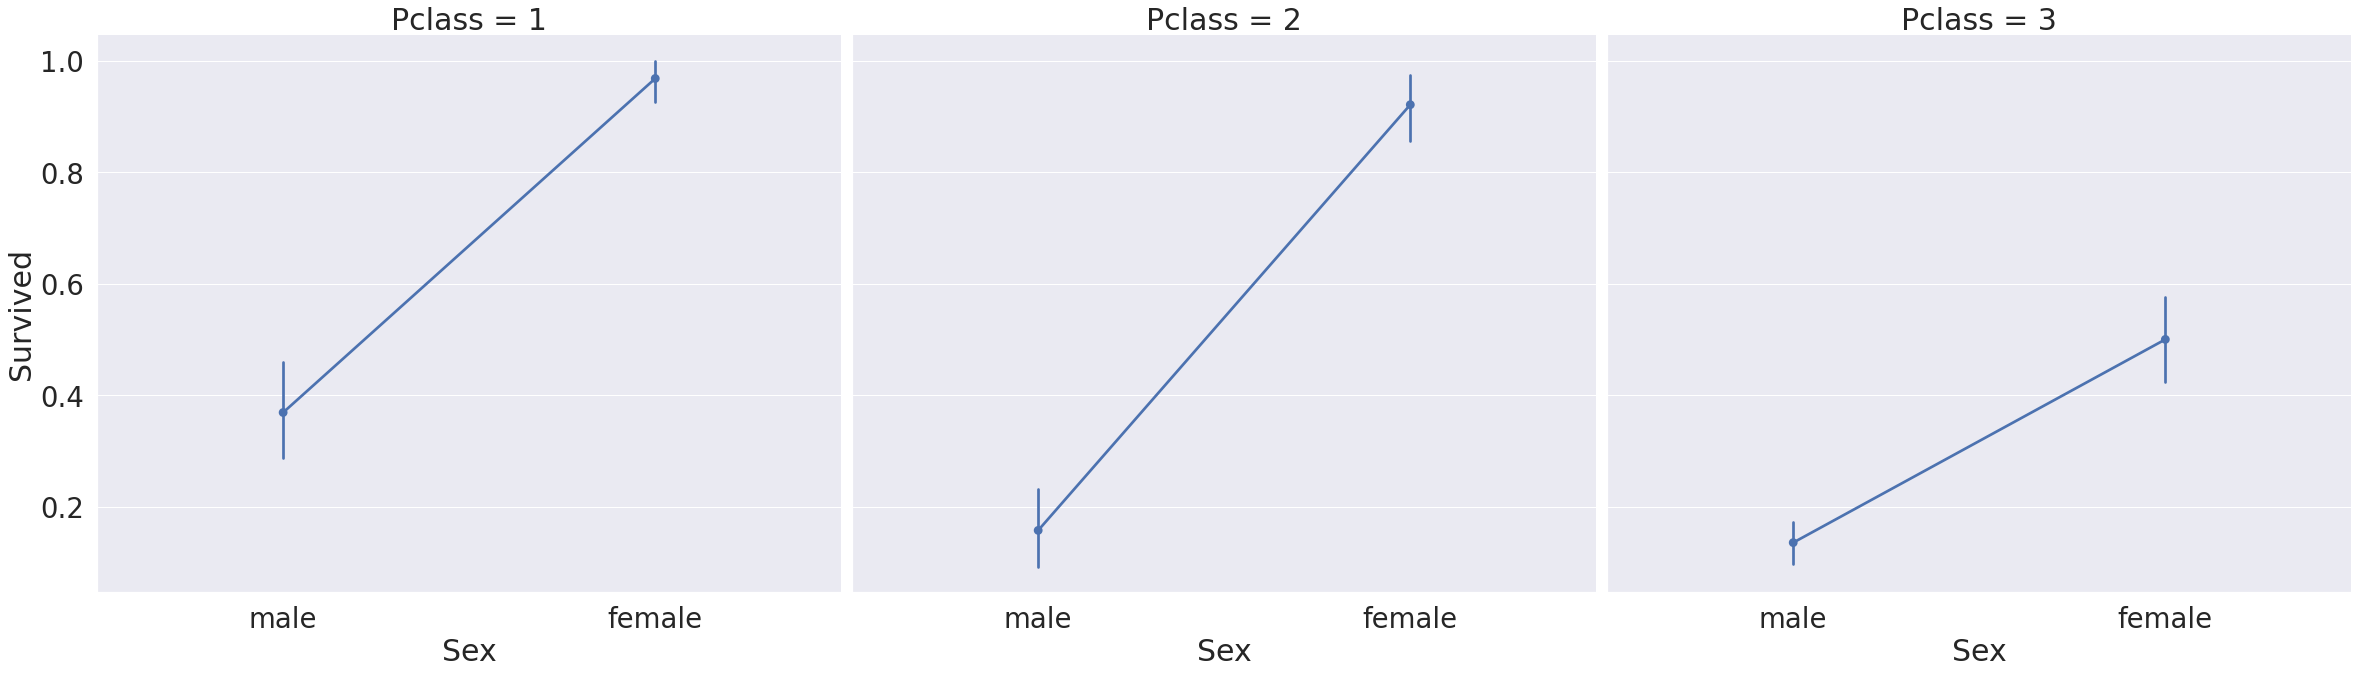

In [14]:
sns.factorplot('Sex','Survived',col='Pclass', data = df_train, saturation=0.5, size=9, aspect=1.2)

In [15]:
print('젤 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('젤 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균나이: {:.1f} Years'.format(df_train['Age'].mean()))

젤 나이 많은 탑승객 : 80.0 Years
젤 어린 탑승객 : 0.4 Years
탑승객 평균나이: 29.7 Years


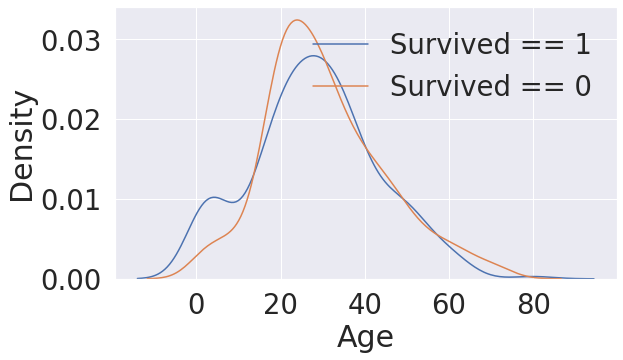

In [16]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

Text(0.5, 1.0, 'MMMM')

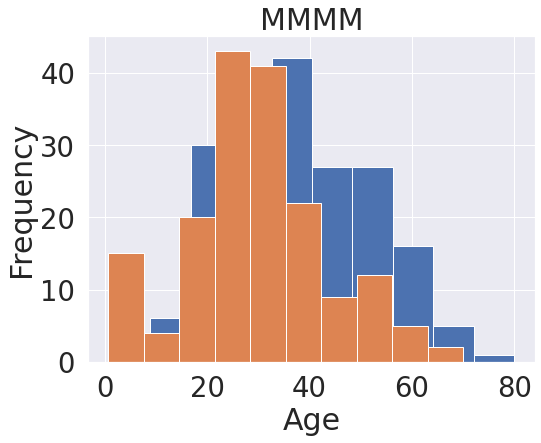

In [17]:
f, ax =plt.subplots(1,1, figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='hist', ax=ax)
df_train['Age'][df_train['Pclass']==2].plot(kind='hist', ax=ax)

ax.set_xlabel('Age')
ax.set_title('MMMM')

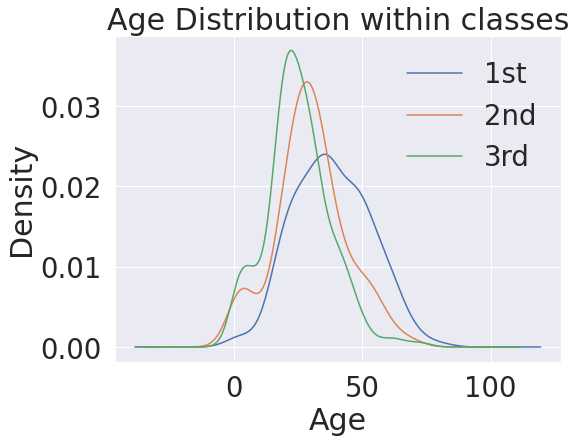

In [18]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st', '2nd', '3rd'])

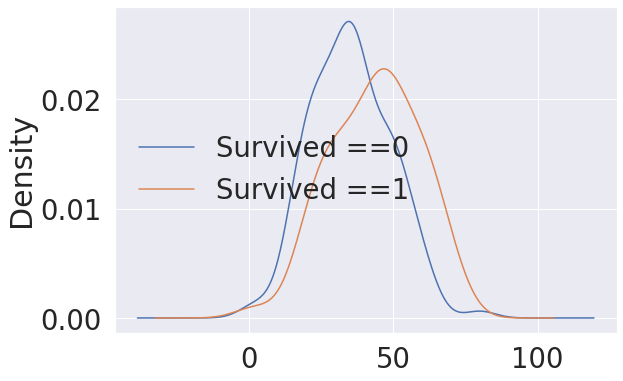

In [19]:
f, ax = plt.subplots(1, 1, figsize=(9,6))
df_train['Age'][(df_train['Survived']==1) & (df_train['Pclass'] == 1)].plot(kind = 'kde', ax=ax)
df_train['Age'][(df_train['Survived']==0) & (df_train['Pclass']== 1)].plot(kind='kde', ax=ax)
ax.legend(['Survived ==0', 'Survived ==1'])

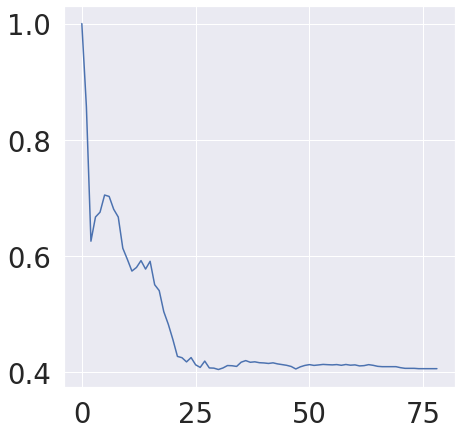

In [20]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)

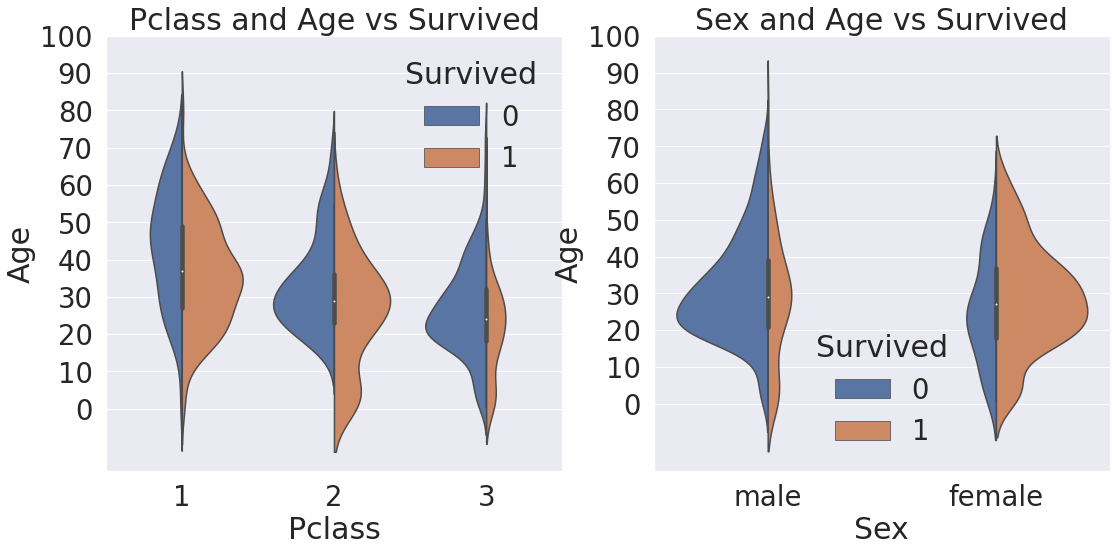

In [21]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train,scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=df_train, scale='count',split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<AxesSubplot:xlabel='Embarked'>

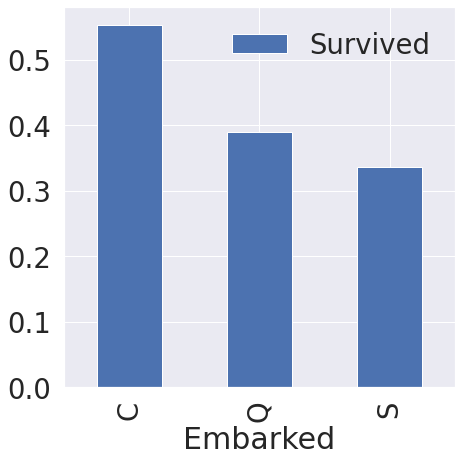

In [22]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True)\
.mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [23]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


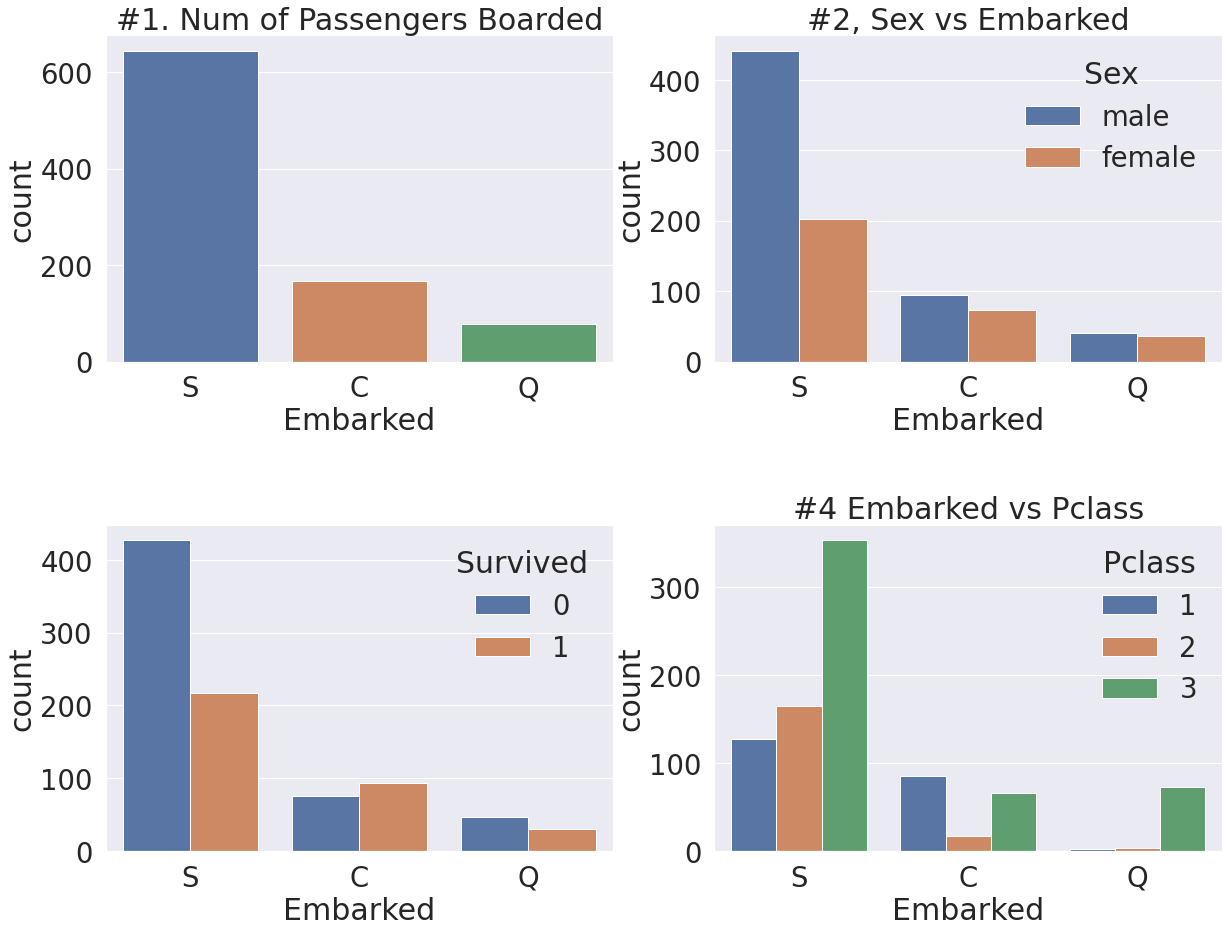

In [24]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('#1. Num of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data= df_train, ax=ax[0,1])
ax[0,1].set_title('#2, Sex vs Embarked')

sns.countplot('Embarked', hue ="Survived", data= df_train, ax=ax[1,0])
ax[1,1].set_title('#3, Surived vs Embarked')

sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('#4 Embarked vs Pclass')


plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [25]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']+1

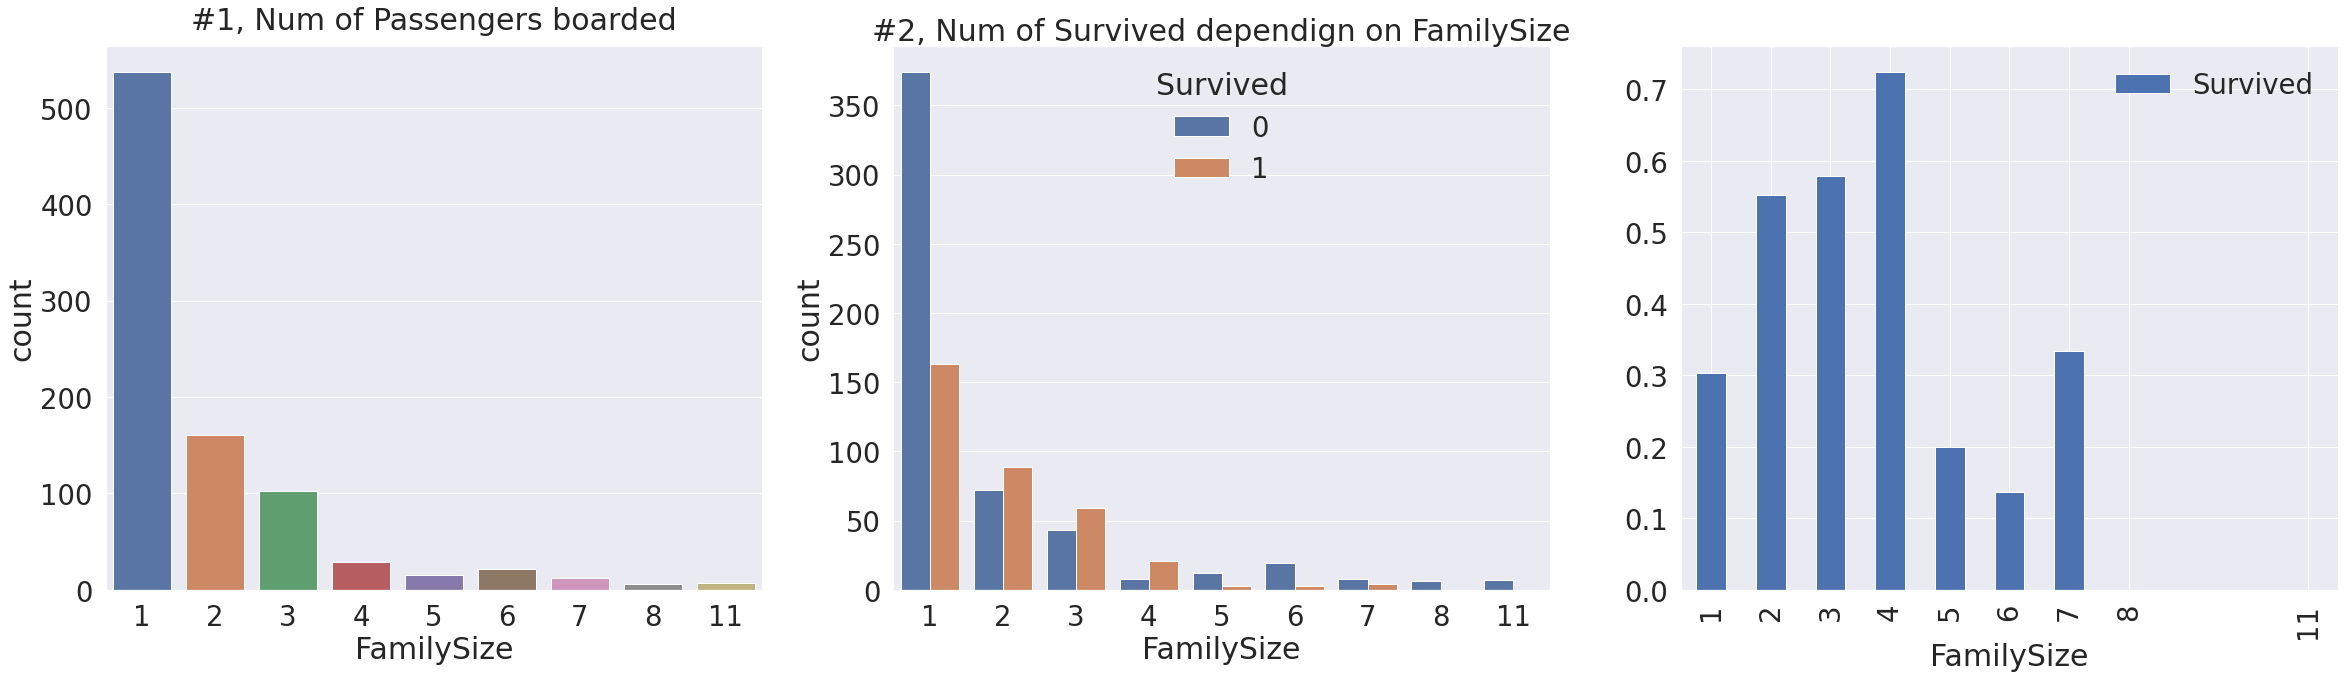

In [26]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('#1, Num of Passengers boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('#2, Num of Survived dependign on FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

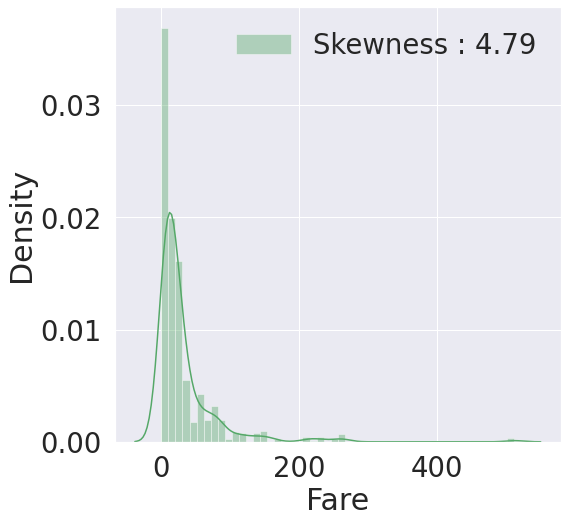

In [27]:
f, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='g', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

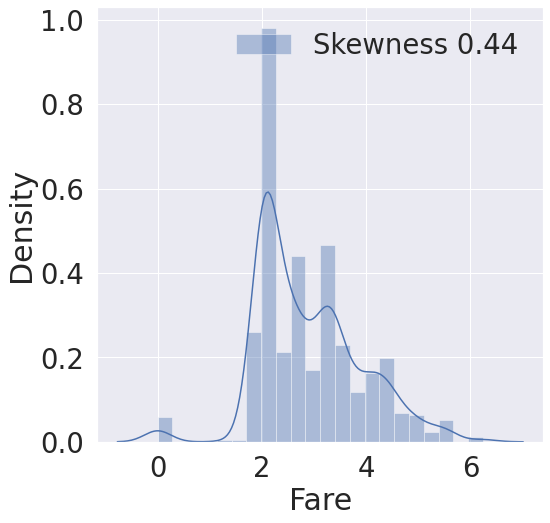

In [28]:
df_test.loc[df_test['Fare'].isnull()] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

f, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label = 'Skewness {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [29]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [30]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient()

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [31]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace = True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace = True)


<AxesSubplot:xlabel='Initial'>

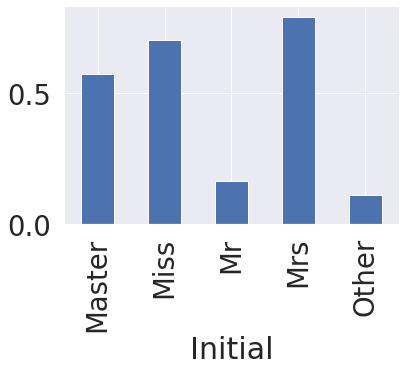

In [32]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [33]:
df_all = pd.concat([df_train, df_test])

In [34]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = df_train.loc[df_train['Initial'] == 'Mr', 'Age'].mean()
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = df_train.loc[df_train['Initial'] == 'Mrs', 'Age'].mean()
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = df_train.loc[df_train['Initial'] == 'Master', 'Age'].mean()
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = df_train.loc[df_train['Initial'] == 'Miss', 'Age'].mean()
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = df_train.loc[df_train['Initial'] == 'Other', 'Age'].mean()

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = df_train.loc[df_train['Initial'] == 'Mr', 'Age'].mean()
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = df_train.loc[df_train['Initial'] == 'Mrs', 'Age'].mean()
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = df_train.loc[df_train['Initial'] == 'Master', 'Age'].mean()
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = df_train.loc[df_train['Initial'] == 'Miss', 'Age'].mean()
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = df_train.loc[df_train['Initial'] == 'Other', 'Age'].mean()



In [35]:
df_train.loc[df_train['Age'] < 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,3.048088,NaN,S,5,Master
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,2.815409,G6,S,3,Miss
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,3.371597,NaN,Q,6,Master
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,3.048088,NaN,S,5,Miss
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,3.727600,NaN,C,4,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,3.611031,NaN,C,3,Master
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,2.931194,NaN,S,3,Master
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,3.442819,NaN,S,7,Master
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,2.724304,NaN,C,3,Miss


In [36]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else :
        return 7
    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [37]:
df_train.drop(['Age'], axis = 1, inplace = True)
df_test.drop(['Age'], axis =1, inplace = True )

In [38]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1,'Mr':2, 'Mrs' : 3, 'Other' :4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [39]:
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = 'S'

In [40]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q':1, 'S':2})

In [41]:
df_train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [42]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male' :1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

<AxesSubplot:title={'center':'Pearson Correlation'}>

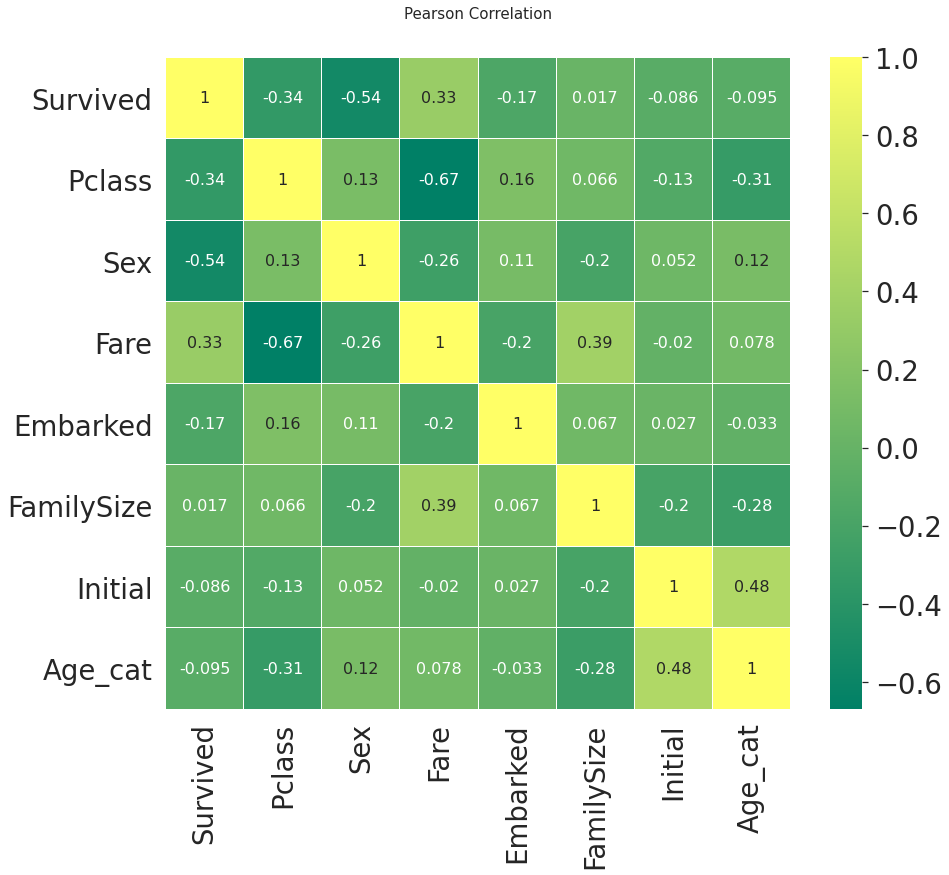

In [43]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.summer
f, ax = plt.subplots(1,1, figsize =(14,12))
plt.title('Pearson Correlation', y = 1.05, size =15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0, cmap=colormap, annot=True, annot_kws={'size':16})

In [44]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [45]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [46]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [48]:
X_train = df_train.drop('Survived', axis =1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [49]:
X_tr, X_vld, Y_tr, Y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state=2018)

In [50]:
model = RandomForestClassifier()
model.fit(X_tr, Y_tr)
prediction = model.predict(X_vld)

In [51]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(Y_vld.shape[0], 100*metrics.accuracy_score(prediction, Y_vld)))

총 268명 중 82.09% 정확도로 생존 맞춤


In [52]:
submission = pd.read_csv('../input/gender_submission.csv')
submissio.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/gender_submission.csv'